# the Iris Dataset

**The data consist of the following:** 

- **Features** in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm


- **Target classes** to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# print(iris.DESCR)

## K-nearest neighbor (KNN)

The K-nearest neighbor (KNN) classifier is a simple, non-parametric algorithm used for classification (and regression). The idea is to classify a new input $\mathbf{x} \$ based on the labels of its K nearest neighbors in the training set.

### Formula Explanation

#### Formula 
$\ p(y = c \mid \mathbf{x}, \mathcal{D}) = \frac{1}{K} \sum_{n \in N_K(\mathbf{x}, \mathcal{D})} \mathbb{I}(y_n = c) \$

This formula calculates the probability that the new input \( \mathbf{x} \) belongs to class \( c \).

- $\mathbf{x} $: The new input vector we want to classify.
- $\mathcal{D} $: The training dataset.
- $\ N_K(\mathbf{x}, \mathcal{D}) $: The set of the K nearest neighbors to $\mathbf{x}$ in the training set $\mathcal{D}$.
- $\ y_n $: The label of the $\ n $-th nearest neighbor.
- $\ \mathbb{I}(y_n = c) $: An indicator function that is 1 if $\ y_n = c $ (the label of the neighbor is class $\ c $), and 0 otherwise.
- $\ \frac{1}{K} $: Normalizes the sum by the number of neighbors $K$, giving the average probability.

### Steps to Calculate the Probability:
1. **Identify Neighbors**: Find the $K$ nearest neighbors to $\mathbf{x}$ in the training data.
2. **Compute Labels**: Check the labels of these $K$ neighbors.
3. **Count Class Instances**: Count how many of these $K$ neighbors have the label $c$.
4. **Calculate Probability**: Divide the count by $K$ to get the probability that $\mathbf{x}$ belongs to class $c$.

#### Formula 
$\ d_M(\mathbf{x}, \mu) = \sqrt{(\mathbf{x} - \mu)^\top \mathbf{M}(\mathbf{x} - \mu)} $

This formula represents the Mahalanobis distance, which is a distance measure that takes into account the correlations of the data.

- $\mathbf{x}$: The vector of the point whose distance to the mean $\mu$ is being measured.
- $\mu$: The mean vector of the distribution.
- $\mathbf{M}$: A positive definite matrix (often the inverse of the covariance matrix of the data).
- $\ (\mathbf{x} - \mu)^\top $: The transpose of the vector difference $\mathbf{x} - \mu $ .

### Steps to Calculate the Mahalanobis Distance:
1. **Subtract Mean**: Compute $\ \mathbf{x} - \mu $.
2. **Transpose**: Compute the transpose $\ (\mathbf{x} - \mu)^\top $.
3. **Matrix Multiplication**: Multiply the transpose by the matrix $\ \mathbf{M}$, and then by $\ (\mathbf{x} - \mu)$.
4. **Square Root**: Take the square root of the result to get the Mahalanobis distance.

### Summary

- **KNN Classification**: To classify a new input, we look at its K nearest neighbors in the training set and use their labels to compute the probability of each class.
- **Distance Metric**: The Mahalanobis distance is one way to measure the "closeness" of points, taking into account the shape of the data distribution. If $\ \mathbf{M} = \mathbf{I}$ (the identity matrix), the Mahalanobis distance reduces to the Euclidean distance.

Understanding these concepts allows us to implement the KNN classifier effectively, using the appropriate distance metrics to improve classification accuracy based on the nature of the data.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [6]:
X, y = iris.data, iris.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y,
                                                   )
print(y_train);print(y_test)

[1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
[0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 2 2 2 1 0 0 1 1 0 2 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]


In [10]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [12]:
print(f'The Accuracy Of The Training Set: {knn.score(X_train, y_train):%}')
print(f'The Accuracy Of The Test Set: {knn.score(X_test, y_test):%}')

The Accuracy Of The Training Set: 98.666667%
The Accuracy Of The Test Set: 94.666667%


In [16]:
import numpy as np

print('Samples correctly classified:')
corrent_index = np.where(y_pred == y_test)[0]
print(corrent_index)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(y_pred != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified:
[44 49 54 60]


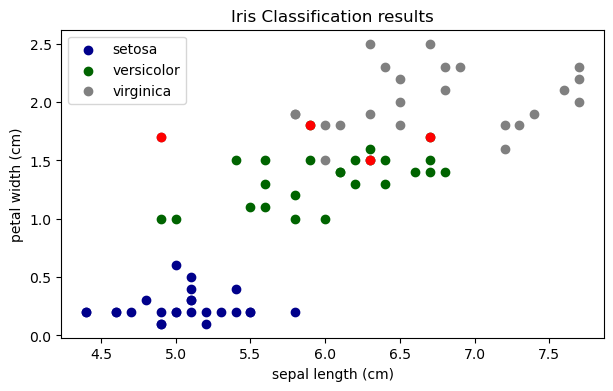

In [18]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 3

plt.figure(figsize=(7, 4))
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors): # [(0, 'darkblue'), (1, 'darkgreen'), (2, 'gray')]
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, x1_index], X_test[idx, x2_index], color=color)

plt.scatter(X_test[incorrect_idx, x1_index], X_test[incorrect_idx, x2_index], color="red")

plt.xlabel(iris.feature_names[x1_index])
plt.ylabel(iris.feature_names[x2_index])
plt.legend(iris.target_names)
plt.title("Iris Classification results")
plt.show()

## Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

In [20]:
from sklearn.neural_network import MLPClassifier
import numpy as np

clf = MLPClassifier(solver='adam', hidden_layer_sizes=(100,100),  max_iter=300)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [22]:
print(f'The Accuracy Of The Training Set: {clf.score(X_train, y_train):.2%}')
print(f'The Accuracy Of The Test Set: {clf.score(X_test, y_test):.2%}')

The Accuracy Of The Training Set: 98.67%
The Accuracy Of The Test Set: 96.00%


In [26]:
print('Samples correctly classified:')
corrent_index = np.where(y_hat == y_test)[0]
print(corrent_index)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(y_hat != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified:
[44 51 53]


### visualization data

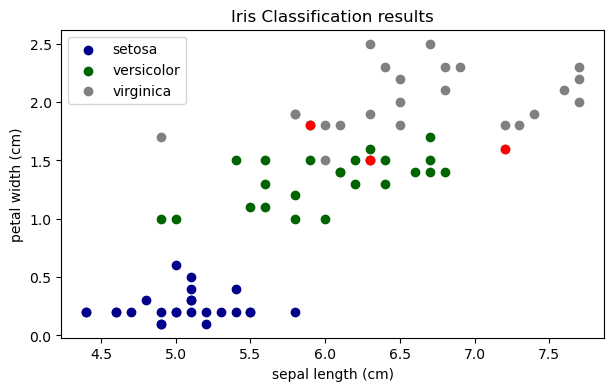

In [29]:
import matplotlib.pyplot as plt
x1_index = 0
x2_index = 3

plt.figure(figsize=(7, 4))
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors): # [(0, 'darkblue'), (1, 'darkgreen'), (2, 'gray')]
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, x1_index], X_test[idx, x2_index], color=color)

plt.scatter(X_test[incorrect_idx, x1_index], X_test[incorrect_idx, x2_index], color="red")

plt.xlabel(iris.feature_names[x1_index])
plt.ylabel(iris.feature_names[x2_index])
plt.legend(iris.target_names)
plt.title("Iris Classification results")
plt.show()